In [20]:
import pandas as pd
import numpy as np

In [29]:
train_data = pd.read_csv("round1_ijcai_18_train_20180301.txt", sep=" ")
test_data = pd.read_csv("round1_ijcai_18_test_a_20180301.txt", sep=" ")

In [30]:
train_data.describe()
#test_data.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.00000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.838444e+18,5.500420e+18,6.777175,11.13384,12.199336,17.128676,4.609864e+18,0.213047,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994830,5013.175240,0.971124,0.970497,0.974863,0.018867
std,2.663448e+18,2.710140e+18,2.694756e+18,2.464881e+18,1.089037,2.58886,2.497312,2.160745,2.663355e+18,0.514699,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.011972,2.590989,0.023817,0.023776,0.025024,0.136055
min,3.823219e+12,6.964907e+14,-1.000000e+00,-1.000000e+00,0.000000,-1.00000,0.000000,0.000000,2.477979e+13,-1.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,-1.000000,4999.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.00000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966360,0.965684,0.969268,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.00000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.00000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.00000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#查找含有缺失值的特征
#众数填补缺失值 -1
none_list = ['item_brand_id','item_city_id','item_sales_level','user_gender_id','shop_review_positive_rate','shop_score_service','shop_score_delivery','shop_score_description']
for label in none_list:
    test_data = test_data.replace({label: -1},test_data[label].median())#mean()
    train_data = train_data.replace({label:-1},train_data[label].median())
test_data.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_id,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
count,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,...,1.837100e+04,1.837100e+04,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,4.607419e+18,4.582686e+18,4.850149e+18,5.560198e+18,6.837951,11.132056,12.228621,17.035382,4.594443e+18,0.246475,...,4.642666e+18,1.537862e+09,4003.377171,4.717927e+18,15.816123,0.994915,5013.228948,0.971429,0.970566,0.975148
std,2.674410e+18,2.700034e+18,2.703320e+18,2.442676e+18,1.046772,2.613974,2.549283,2.237930,2.665790e+18,0.479064,...,2.661417e+18,1.937280e+04,4.022065,2.604679e+18,2.879969,0.008981,2.646194,0.009299,0.009288,0.011928
min,1.772728e+14,1.097631e+15,2.258580e+15,1.962573e+17,1.000000,1.000000,0.000000,0.000000,1.794514e+14,0.000000,...,1.120952e+13,1.537805e+09,4001.000000,1.205713e+16,1.000000,0.870588,5000.000000,0.900728,0.896471,0.858856
25%,2.287309e+18,2.251088e+18,2.351872e+18,3.948283e+18,6.000000,10.000000,11.000000,16.000000,2.300070e+18,0.000000,...,2.369361e+18,1.537848e+09,4001.000000,2.527080e+18,14.000000,0.992824,5012.000000,0.966399,0.965516,0.969490
50%,4.627598e+18,4.668472e+18,5.051040e+18,7.322157e+18,7.000000,11.000000,13.000000,17.000000,4.566476e+18,0.000000,...,4.655476e+18,1.537863e+09,4001.000000,4.598382e+18,16.000000,1.000000,5013.000000,0.972481,0.971511,0.978514
75%,6.928380e+18,7.002632e+18,7.555983e+18,7.534239e+18,8.000000,13.000000,14.000000,19.000000,6.893871e+18,0.000000,...,6.932690e+18,1.537878e+09,4004.000000,6.740687e+18,18.000000,1.000000,5015.000000,0.977937,0.976823,0.983543
max,9.222350e+18,9.221980e+18,9.222396e+18,9.151271e+18,10.000000,17.000000,17.000000,21.000000,9.222798e+18,2.000000,...,9.223243e+18,1.537891e+09,4020.000000,9.220773e+18,23.000000,1.000000,5020.000000,1.000000,1.000000,1.000000


In [34]:
train_data.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.834317e+18,5.498981e+18,6.777175,11.156754,12.199336,17.128676,4.609864e+18,0.240031,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994859,5013.175240,0.971367,0.970740,0.975107,0.018867
std,2.663448e+18,2.710140e+18,2.705338e+18,2.468816e+18,1.089037,2.533884,2.497312,2.160745,2.663355e+18,0.475085,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.009223,2.590989,0.009369,0.009281,0.012038,0.136055
min,3.823219e+12,6.964907e+14,-4.172332e+18,-2.485089e+18,0.000000,1.000000,0.000000,0.000000,2.477979e+13,0.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,0.714286,4999.000000,0.786667,0.830000,0.786667,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.000000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966363,0.965684,0.969282,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.000000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.000000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.000000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


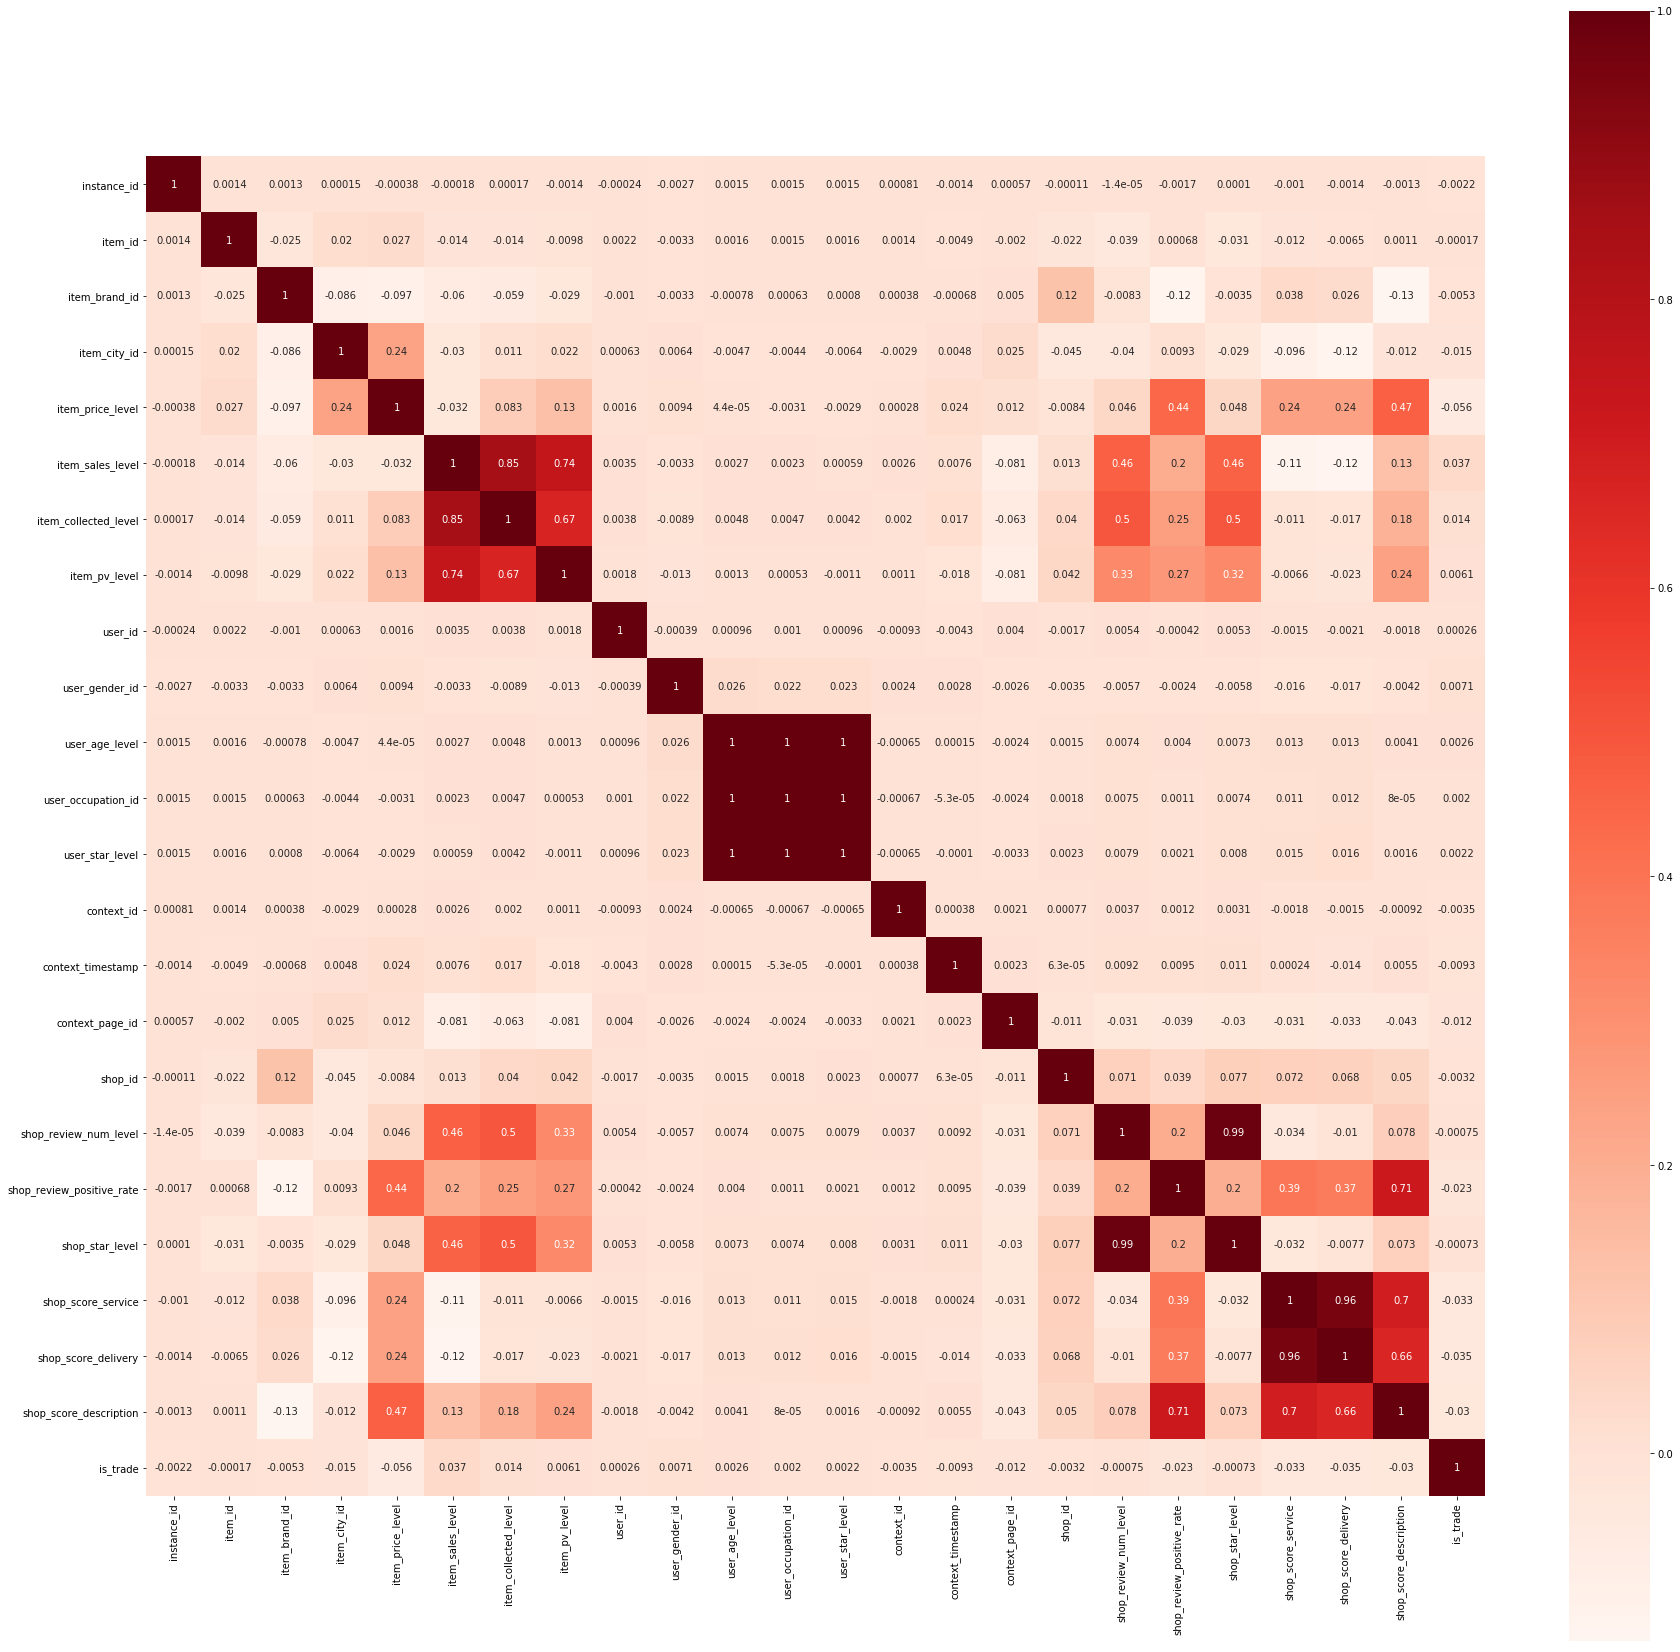

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
#def plot_heatmap():
dfdata = train_data.corr()   
plt.subplots(figsize=(30,30))
#vmax,vmin:分别是热力图的颜色取值最大和最小范围
#annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据
sns.heatmap(dfdata, annot=True, vmax=1, square=True, cmap='Reds')
plt.savefig("./bluestaterelation1.png")
plt.show()